### Import libaraies

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report
import seaborn as sb

from sklearn.metrics import make_scorer, confusion_matrix
import warnings



sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

Reading input data

In [2]:
survey_df = pd.read_csv('Kaggle_Salary.csv', encoding = 'UTF-8', low_memory = False)
survey_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RapidMiner,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,Na

# 1. Data Cleanning

In [3]:
survey_df.shape

(12497, 248)

From the shape of the survey dataset, we know there are 12497 rows and 248 columns in the dataframe. From the describe function code below, we could have a general idea on the raw dataset such as the mode, the mean, etc. We noticed that there are 34 questions asked in this survey. Some of the questions are multiple choice, some of the questions are single answer question. In this section, i will perform the data cleaning process to the orginal dataset, the missing values will be spotted and replaced or dropped depend on different situations. 

In [4]:
survey_df.describe(include='all')

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
count,12497.000000,12497,12497,12497.000000,12497,12497,12497,12497.000000,12497,12497,12497,5979,3507,4890,3285,3634,2303,515,239,12497.000000,12497,12250,2785,1386,2404,7757,2817,5116,1644,7333,3494,1881,374,883,12497.000000,2278,6487,2439,2978,557,...,418,581,586,372,438,400,265,315,569,4313,225,12497.000000,498,277,191,171,176,465,756,279,28,133,5175,132,12497.000000,3122,2160,1527,1852,1192,547,588,415,479,526,1245,287,12497.000000,12497.000000,12497
unique,NaN,11,4,NaN,59,7,10,NaN,5,7,6,1,1,1,1,1,1,1,1,NaN,25,6,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,15
top,NaN,25-29,Male,NaN,India,Master’s degree,Data Scientist,NaN,0-49 employees,20+,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,Do research that advances the state of the art...,None of these activities are an important part...,Other,NaN,$0-999,$0 (USD),Twitter (data science influencers),Hacker News (https://news.ycombinator.com/),"Reddit (r/machinelearning, r/datascience, etc)","Kaggle (forums, blog, social media, etc)","Course Forums (forums.fast.ai, etc)","YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",None,Other,NaN,Udacity,Coursera,edX,DataCamp,DataQuest,...,Cloudera,Azure Machine Learning Studio,Google Cloud Machine Learning Engine,Google Cloud Vision,Google Cloud Speech-to-Text,Google Cloud Natural Language,RapidMiner,Google Cloud Translation,Amazon SageMaker,None,Other,NaN,Google AutoML,H20 Driverless AI,Databricks AutoML,DataRobot AutoML,Tpot,Auto-Keras,Auto-Sklearn,Auto_ml,Xcessiv,MLbox,None,Other,NaN,MySQL,PostgresSQL,SQLite,Microsoft SQL Server,Oracle Database,Microsoft Access,AWS Relational Database Service,AWS DynamoDB,Azure SQL Database,Google Cloud SQL,None,Other,NaN,NaN,"0-9,999"
freq,NaN,3075,10473,NaN,2477,5868,3640,NaN,3530,2896,2636,5979,3507,4890,3285,3634,2303,515,239,NaN,1513,4038,2785,1386,2404,7757,2817,5116,1644,7333,3494,1881,374,883,NaN,2278,6487,2439,2978,557,...,418,581,586,372,438,400,265,315,569,4313,225,NaN,498,277,191,171,176,465,756,279,28,133,5175,132,NaN,3122,2160,1527,1852,1192,547,588,415,479,526,1245,287,NaN,NaN,4040
mean,14186.510202,NaN,NaN,-0.963191,NaN,NaN,NaN,29.216932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.250940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.103465,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.396975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.762663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084420,3.920061,NaN
std,72866.379285,NaN,NaN,0.978525,NaN,NaN,NaN,122.208237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.257127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### I. Handling missing values
In this step, i will first check the number of NaN in each of the column, and have a overall idea of the NaN's distribution.


#### a. Check how many NaN in each column

In [5]:
print(survey_df.isna().sum())


Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q2_OTHER_TEXT                              0
Q3                                         0
Q4                                         0
Q5                                         0
Q5_OTHER_TEXT                              0
Q6                                         0
Q7                                         0
Q8                                         0
Q9_Part_1                               6518
Q9_Part_2                               8990
Q9_Part_3                               7607
Q9_Part_4                               9212
Q9_Part_5                               8863
Q9_Part_6                              10194
Q9_Part_7                              11982
Q9_Part_8                              12258
Q9_OTHER_TEXT                              0
Q10                                        0
Q11                                      247
Q12_Part_1

From the previous step, we see that there are two types of questions that contains a lot of NaN. First type questions contain around 3000 NaN from part 1 and increased to over 10000 NaN for the last part (eg. Q21 Part_1 to Part_5); Second type questions contain over 10000 NaN for all parts (eg. Q34 Part_1 to Part 12). 
<p><b>Why NaN in the frist type questions?</b>
<p>By checking the question content asked in the first type, we noticed that these questions are multiple choice list questions. The NaN appears when people did not selected the given option. 
<p><b>Why NaN in the second type questions?</b>
<p>The second type contains a lot of NaN might because there are 34 questions in total, people tend to lose patient when answering through questions. Therefore, when getting to question like Q25, people just skip them and not selecting any of the given options and then NaN appears in our dataframe.

#### b. Drop the columns that contains large amount of NaN (eg. around 10000 NaN)

<p>Drop Q9, Q12,Q13,Q17,Q20,Q25 - Q34. I also drop "Q10" since the question 10 is already encoded and added to the end of the dataframe. 
<p><b>How does this approach affect the overall analysis?</b>
<p>This would have very minimum impact (almost no impact) on the overall analysis since there are 12497 rows and around 10000 NaN in the questions.




In [6]:
col_to_keep = ["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q11","Q14","Q15","Q16_Part_1","Q16_Part_2","Q16_Part_3","Q16_Part_4","Q16_Part_5","Q16_Part_6","Q16_Part_7","Q16_Part_8","Q16_Part_9","Q16_Part_10","Q18_Part_1","Q18_Part_2","Q18_Part_3","Q18_Part_4","Q18_Part_5","Q18_Part_6","Q18_Part_7","Q18_Part_8","Q18_Part_9","Q18_Part_10","Q19","Q22","Q21_Part_1","Q21_Part_2","Q21_Part_3","Q23","Q24_Part_1","Q24_Part_2","Q24_Part_3","Q24_Part_4","Q24_Part_5","Q24_Part_6","Q24_Part_7","Q24_Part_8","Q24_Part_9","Q24_Part_10","Q10_Encoded","Q10_buckets"]
survey_df = survey_df[col_to_keep]
survey_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q14,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q19,Q22,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q10_Encoded,Q10_buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,$0 (USD),"Basic statistical software (Microsoft Excel, G...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,Python,Never,CPUs,GPUs,NaN,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","> $100,000 ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"$10,000-$99,999","Local development environments (RStudio, Jupyt...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,NaN,Visual Studio / Visual Studio Code,NaN,NaN,NaN,NaN,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,Python,Once,CPUs,GPUs,NaN,2-3 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,Convolutional Neural Networks,NaN,NaN,NaN,14,">250,000"
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),$0 (USD),"Local development environments (RStudio, Jupyt...",< 1 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Never,CPUs,GPUs,NaN,< 1 years,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999"
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","$10,000-$99,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,Never,CPUs,GPUs,NaN,10-15 years,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,NaN,Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Networks,NaN,6,"60,000-69,999"


In [7]:
survey_df.shape

(12497, 49)

#### c. Replace NaN values with a certain value


As we can see from the remaining columns, many columns still contains NaN but not that many NaN. In this step, I will replace the NaN with certain values.


*   First, check the NaN values for the remaining columns
*   Second, replace NaN values with certain value for each of the columns. For columns with random distribute NaN, I will replace the NaN with mode (replace by mode because the data is categorical data). For columns that are not suitable for mode, I will replace NaN with "Unknow".





In [8]:
print(survey_df.isna().sum())

Q1                 0
Q2                 0
Q3                 0
Q4                 0
Q5                 0
Q6                 0
Q7                 0
Q8                 0
Q11              247
Q14             1045
Q15             1075
Q16_Part_1      4682
Q16_Part_2      9006
Q16_Part_3      9354
Q16_Part_4     11446
Q16_Part_5     11394
Q16_Part_6      9094
Q16_Part_7     10354
Q16_Part_8     11034
Q16_Part_9      9865
Q16_Part_10    10586
Q18_Part_1      3134
Q18_Part_2      8845
Q18_Part_3      7069
Q18_Part_4     11548
Q18_Part_5     11141
Q18_Part_6     10899
Q18_Part_7     10777
Q18_Part_8     12144
Q18_Part_9     10734
Q18_Part_10    11535
Q19             1844
Q22             1947
Q21_Part_1      4613
Q21_Part_2      7585
Q21_Part_3     12128
Q23             1956
Q24_Part_1      4854
Q24_Part_2      5973
Q24_Part_3      8070
Q24_Part_4      9631
Q24_Part_5     11797
Q24_Part_6     10047
Q24_Part_7      8566
Q24_Part_8     11769
Q24_Part_9      9899
Q24_Part_10    11756
Q10_Encoded  




*   Q11







In [9]:
survey_df['Q11'].unique()

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99', nan], dtype=object)

In [10]:
# Most of the answers are 0 dollars based on the normalized value counts
survey_df['Q11'].value_counts(normalize=True)

$0 (USD)             0.329633
$100-$999            0.190612
$1000-$9,999         0.173306
$1-$99               0.121224
$10,000-$99,999      0.103510
> $100,000 ($USD)    0.081714
Name: Q11, dtype: float64

In [0]:
survey_df['Q11'].fillna(survey_df['Q11'].mode()[0],inplace=True)



*   Q14



In [12]:
survey_df['Q14'].unique()

array(['Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Local development environments (RStudio, JupyterLab, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)', 'Other',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       nan], dtype=object)

In [13]:
survey_df['Q14'].value_counts(normalize=True)

Local development environments (RStudio, JupyterLab, etc.)              0.517377
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.182850
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.090203
Other                                                                   0.076057
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.068722
Advanced statistical software (SPSS, SAS, etc.)                         0.064792
Name: Q14, dtype: float64

In [0]:
survey_df.loc[survey_df['Q14'].isnull(), 'NaN'] = 'Unknown'



*   Q15



In [15]:
survey_df['Q15'].unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years', nan], dtype=object)

In [16]:
survey_df['Q15'].value_counts(normalize=True)

3-5 years                    0.246717
1-2 years                    0.237524
< 1 years                    0.179391
5-10 years                   0.153126
10-20 years                  0.087901
I have never written code    0.048328
20+ years                    0.047015
Name: Q15, dtype: float64

In [0]:
survey_df['Q15'].fillna(survey_df['Q15'].mode()[0],inplace=True)



*   Q19


In [18]:
survey_df['Q19'].unique()

array(['Python', nan, 'Java', 'R', 'SQL', 'C++', 'None', 'Other', 'C',
       'MATLAB', 'TypeScript', 'Javascript', 'Bash'], dtype=object)

In [19]:
survey_df['Q19'].value_counts(normalize=True)

Python        0.769736
R             0.100723
SQL           0.069089
C++           0.012015
MATLAB        0.010795
Other         0.010607
C             0.007885
Java          0.006571
None          0.005726
Javascript    0.003473
Bash          0.002910
TypeScript    0.000469
Name: Q19, dtype: float64

In [0]:
survey_df['Q19'].fillna(survey_df['Q19'].mode()[0],inplace=True)



*   Q22


In [21]:
survey_df['Q22'].unique()

array(['Never', nan, 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

In [22]:
survey_df['Q22'].value_counts(normalize=True)

Never         0.806825
Once          0.092512
2-5 times     0.075355
6-24 times    0.013744
> 25 times    0.011564
Name: Q22, dtype: float64

In [0]:
survey_df['Q22'].fillna(survey_df['Q22'].mode()[0],inplace=True)



*   Q23         



In [24]:
survey_df['Q23'].unique()

array(['1-2 years', nan, '2-3 years', '< 1 years', '10-15 years',
       '3-4 years', '4-5 years', '5-10 years', '20+ years'], dtype=object)

In [25]:
survey_df['Q23'].value_counts(normalize=True)

< 1 years      0.291054
1-2 years      0.258704
2-3 years      0.148847
3-4 years      0.092496
4-5 years      0.081871
5-10 years     0.079025
10-15 years    0.031306
20+ years      0.016697
Name: Q23, dtype: float64

In [0]:
survey_df['Q23'].fillna(survey_df['Q23'].mode()[0],inplace=True)

<b>How does this approach might impact on the overall analysis.</b>
<p>In this step, i replaced the NaN with mode for Q11 (247 NaN), Q14 (1045 NaN), Q15 (1075 NaN), Q19 (1844 NaN), Q22 (1947 NaN), Q23 (1956 NaN). For those questions, we only have a very small amount of missing data, therefore, subsituting the mode do not harm the overall analysis. 

In [27]:
survey_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q14,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q19,Q22,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q10_Encoded,Q10_buckets,NaN
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,$0 (USD),"Basic statistical software (Microsoft Excel, G...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,Python,Never,CPUs,GPUs,NaN,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"30,000-39,999",NaN
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","> $100,000 ($USD)","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Never,NaN,NaN,NaN,< 1 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999",NaN
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"$10,000-$99,999","Local development environments (RStudio, Jupyt...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,NaN,Visual Studio / Visual Studio Code,NaN,NaN,NaN,NaN,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,Python,Once,CPUs,GPUs,NaN,2-3 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,Convolutional Neural Networks,NaN,NaN,NaN,14,">250,000",NaN
3,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),$0 (USD),"Local development environments (RStudio, Jupyt...",< 1 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Never,CPUs,GPUs,NaN,< 1 years,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999",NaN
4,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","$10,000-$99,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,Never,CPUs,GPUs,NaN,10-15 years,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,NaN,Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Networks,NaN,6,"60,000-69,999",NaN


### II. Change categorical data to numerical data for further analysis.
*   Multiple choice lists questions, I converted this type of questions to onehot encoding format. Answer with NaN will replaced by 0, anwer selected will replacced by 1. The "None" and "I don't know" selection has been dropped in these multiple choice lists questions (eg. Q16_part_11, and Q16_part_12)


*   Ordinal Data

  *   This type of data is a type of categorical data with an order. Higher number means they might have larger impact on the target variable. For example, 10 years machine learing experience might have higher salary than 1 year machine learning experience. Features such as "Education Level","ML experience","Code Experience","ML Investment","Machine Learning Method","Company Size" belongs to ordinal data. For this type of data, i will use the label encoding method, assign categories with number in order. The higher the better. 


*   Nominal data

  *   Nominal data is defined as data that is used for naming or labelling variables, without any quantitative value. Such as "Job Title","Tools","Gender" in the dataframe. In this case, i will use the onehot encoding method (dummy variables) in order to remove the possible bias caused.



*   There are also columns that contains range values, such as "Age" column in our dataframe. In this case, i will encode the range with the mean of the value. I will first remove "-","+",">", etc for futher














In [0]:
#Q16. Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)
integrated_development_environments = ['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7','Q16_Part_8','Q16_Part_9','Q16_Part_10']
for i in range(len(integrated_development_environments)):
    survey_df[integrated_development_environments[i]] = survey_df[integrated_development_environments[i]].apply(lambda x: 1 if (type(x) is str) else 0)
#Q18. What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
programming_languages = ['Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5','Q18_Part_6','Q18_Part_7','Q18_Part_8','Q18_Part_9','Q18_Part_10']
for i in range(len(programming_languages)):
    survey_df[programming_languages[i]] = survey_df[programming_languages[i]].apply(lambda x: 1 if (type(x) is str) else 0)
#Q21. Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice - CPUs
hardware = ['Q21_Part_1','Q21_Part_2','Q21_Part_3']
for i in range(len(hardware)):
    survey_df[hardware[i]] = survey_df[hardware[i]].apply(lambda x: 1 if (type(x) is str) else 0)
#Q24. Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression
algorithms = ['Q24_Part_1','Q24_Part_2','Q24_Part_3','Q24_Part_4','Q24_Part_5','Q24_Part_6','Q24_Part_7','Q24_Part_8','Q24_Part_9','Q24_Part_10']
for i in range(len(algorithms)):
    survey_df[algorithms[i]] = survey_df[algorithms[i]].apply(lambda x: 1 if (type(x) is str) else 0)

Before doing further encoding procedure, i will first rename the features so that we know the questions content. 

In [0]:
survey_df = survey_df.rename(columns={'Q1':'Age',
                       'Q2':'Gender',
                       'Q3':'Country',
                       'Q4'	:'Education_Level',
                       'Q5'	:'Job Title',
                       'Q6'	:'Company Size',
                       'Q7'	:'Data Science Individals',
                       'Q8':'Machine Learning Method',
                       'Q11':'ML Investment',
                       'Q14':'Tools',
                       'Q15':'Code Experience',
                       'Q16_Part_1':'Development Environments:Jupyter',
                       'Q16_Part_2':'Development Environments:RStudio ',
                       'Q16_Part_3':'Development Environments:PyCharm ',
                       'Q16_Part_4':'Development Environments:Atom ',
                       'Q16_Part_5':'Development Environments:MATLAB ',
                       'Q16_Part_6':'Development Environments:Visual Studio',
                       'Q16_Part_7':'Development Environments:Spyder',
                       'Q16_Part_8':'Development Environments:Vim / Emacs  ',
                       'Q16_Part_9':'Development Environments:Notepad++  ',
                       'Q16_Part_10':'Development Environments: Sublime Text  ',
                       'Q18_Part_1' : 'hardware: Python',
                       'Q18_Part_2' : 'Programming Language: R',
                       'Q18_Part_3' : 'Programming Language: SQL',
                       'Q18_Part_4' : 'Programming Language: C',
                       'Q18_Part_5' : 'Programming Language: C++',
                       'Q18_Part_6' : 'Programming Language: Java',
                       'Q18_Part_7' : 'Programming Language: Javascript',
                       'Q18_Part_8' : 'Programming Language: TypeScript',
                       'Q18_Part_9' : 'Programming Language: Bash',
                       'Q18_Part_10' : 'Programming Language: MATLAB',
                       'Q19':'Recommend Programming Language',
                       'Q21_Part_1':'Hardware:CPUs',
                       'Q21_Part_2':'Hardware:GPUs ',
                       'Q21_Part_3':'Hardware:TPUs ',
                       'Q22':'TPU Frequency',
                       'Q23':'ML Experience',
                       'Q24_Part_1' : 'ML algorithms: Linear or Logistic Regression',
                       'Q24_Part_2' : 'ML algorithms: Decision Trees or Random Forests',
                       'Q24_Part_3' : 'ML algorithms: Gradient Boosting Machines (xgboost, lightgbm, etc)',
                       'Q24_Part_4' : 'ML algorithms: Bayesian Approaches',
                       'Q24_Part_5' : 'ML algorithms: Evolutionary Approaches',
                       'Q24_Part_6' : 'ML algorithms: Dense Neural Networks (MLPs, etc)',
                       'Q24_Part_7' : 'ML algorithms: Convolutional Neural Networks',
                       'Q24_Part_8' : 'ML algorithms: Generative Adversarial Networks',
                       'Q24_Part_9' : 'ML algorithms: Recurrent Neural Networks',
                       'Q24_Part_10' : 'ML algorithms: Transformer Networks (BERT, gpt-2, etc)',
                       'Q10_Encoded':'Salary_Encoded',
                       'Q10_buckets':'Salary_Buckets'})

In [0]:
# Ordinal Data
survey_df['Education_Level'] = survey_df['Education_Level'].map({'I prefer not to answer':0,
                                                                 'No formal education past high school':0,
                                                                 'Some college/university study without earning a bachelor’s degree':0,
                                                                 'Professional degree':1,
                                                                 'Bachelor’s degree':2,
                                                                 'Master’s degree':3,
                                                                 'Doctoral degree':4})
                                                                
survey_df['Code Experience'] = survey_df['Code Experience'].map({'I have never written code':0,
                                                                 '< 1 years':1,
                                                                 '1-2 years':1,
                                                                 '3-5 years':1,
                                                                 '5-10 years':2,
                                                                 '10-20 years':3,
                                                                 '20+ years':4})

survey_df['ML Experience'] = survey_df['ML Experience'].map({'< 1 years':0,
                                                             '1-2 years':1,
                                                             '2-3 years':2,
                                                             '3-4 years':2,
                                                             '4-5 years':3,
                                                             '5-10 years':4,
                                                             '10-15 years':5,
                                                             '20+ years':6})

survey_df['ML Investment'] = survey_df['ML Investment'].map({'$0 (USD)':0,
                                                             '$1-$99':1,
                                                             '$100-$999':1,
                                                             '$1000-$9,999':2,
                                                             '$10,000-$99,999':3,
                                                             '> $100,000 ($USD)':4})

survey_df['Machine Learning Method'] = survey_df['Machine Learning Method'].map({'I do not know':0,
                                                                                 'No (we do not use ML methods)':0,
                                                                                 'We recently started using ML methods (i.e., models in production for less than 2 years)':1,
                                                                                 'We are exploring ML methods (and may one day put a model into production)':1,
                                                                                 'We use ML methods for generating insights (but do not put working models into production)':2,
                                                                                 'We have well established ML methods (i.e., models in production for more than 2 years)':3})



In [0]:
#Nominal data
survey_df['Gender'] = survey_df['Gender'].map({'Male':'Male',
                                               'Female':'Female',
                                               'Prefer not to say': 'Other',
                                               'Prefer to self-describe': 'Other'})

survey_df['Company Size'] = survey_df['Company Size'].map({'0-49 employees':'Starter',
                                                           '50-249 employees':'Small',
                                                           '250-999 employees': 'Medium',
                                                           '1000-9,999 employees': 'Large',
                                                           '> 10,000 employees':'Huge'})

survey_df['TPU Frequency'] = survey_df['TPU Frequency'].map({'Never':'low',
                                                             'Once':'low',
                                                             '2-5 times':'medium',
                                                             '6-24 times':'medium',
                                                             '> 25 times':'high'})

survey_df['Tools'] = survey_df['Tools'].map({'Basic statistical software (Microsoft Excel, Google Sheets, etc.)':'Basic-stats',
                                             'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)':'Cloud',
                                             'Local development environments (RStudio, JupyterLab, etc.)':'Local',
                                             'Advanced statistical software (SPSS, SAS, etc.)':'Advaced-stats', 
                                             'Other':'Other',
                                             'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)':"Bussiness"})

survey_df['Data Science Individals'] = survey_df['Data Science Individals'].map({'0':'0',
                                                                                 '1-2':'1-9',
                                                                                 '3-4':'1-9',
                                                                                 '5-9':'1-9',
                                                                                 '10-14':'10-19',
                                                                                 '15-19':'10-19',
                                                                                 '20+':'20+',})

# use get_dummies to encode the columns to avoid ordered relationship of the features.
survey_df = pd.get_dummies(survey_df, columns=['Gender'],prefix=['Gender'])
survey_df = pd.get_dummies(survey_df, columns=["Job Title"],prefix=["Title"])
survey_df = pd.get_dummies(survey_df, columns=["Tools"],prefix=["Tool"])
survey_df = pd.get_dummies(survey_df, columns=["Company Size"],prefix=["Company Size"])
survey_df = pd.get_dummies(survey_df, columns=["Data Science Individals"],prefix=["Data Science Individals"])
survey_df = pd.get_dummies(survey_df, columns=["TPU Frequency"],prefix=["TPU frequency"])
survey_df = pd.get_dummies(survey_df, columns=["Recommend Programming Language"],prefix=["Recommend Programming Language"])

# Drop the 'Gender_other','Title_Other','Tool_Other' columns because they can be implied by other dummy variable columns
survey_df = survey_df.drop(['Gender_Other','Title_Other','Tool_Other'],axis=1)

In [0]:
# Columns with range values.
survey_df['Age'] = survey_df['Age'].replace('70+','70-70')

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

survey_df['Age'] = survey_df['Age'].apply(lambda x: split_mean(x))

In [33]:
survey_df.head()

,Age,Country,Education_Level,Machine Learning Method,ML Investment,Code Experience,Development Environments:Jupyter,Development Environments:RStudio,Development Environments:PyCharm,Development Environments:Atom,Development Environments:MATLAB,Development Environments:Visual Studio,Development Environments:Spyder,Development Environments:Vim / Emacs,Development Environments:Notepad++,Development Environments: Sublime Text,hardware: Python,Programming Language: R,Programming Language: SQL,Programming Language: C,Programming Language: C++,Programming Language: Java,Programming Language: Javascript,Programming Language: TypeScript,Programming Language: Bash,Programming Language: MATLAB,Hardware:CPUs,Hardware:GPUs,Hardware:TPUs,ML Experience,ML algorithms: Linear or Logistic Regression,ML algorithms: Decision Trees or Random Forests,"ML algorithms: Gradient Boosting Machines (xgboost, lightgbm, etc)",ML algorithms: Bayesian Approaches,ML algorithms: Evolutionary Approaches,"ML algorithms: Dense Neural Networks (MLPs, etc)",ML algorithms: Convolutional Neural Networks,ML algorithms: Generative Adversarial Networks,ML algorithms: Recurrent Neural Networks,"ML algorithms: Transformer Networks (BERT, gpt-2, etc)",...,Gender_Female,Gender_Male,Title_Business Analyst,Title_DBA/Database Engineer,Title_Data Analyst,Title_Data Engineer,Title_Data Scientist,Title_Product/Project Manager,Title_Research Scientist,Title_Software Engineer,Title_Statistician,Tool_Advaced-stats,Tool_Basic-stats,Tool_Bussiness,Tool_Cloud,Tool_Local,Company Size_Huge,Company Size_Large,Company Size_Medium,Company Size_Small,Company Size_Starter,Data Science Individals_0,Data Science Individals_1-9,Data Science Individals_10-19,Data Science Individals_20+,TPU frequency_high,TPU frequency_low,TPU frequency_medium,Recommend Programming Language_Bash,Recommend Programming Language_C,Recommend Programming Language_C++,Recommend Programming Language_Java,Recommend Programming Language_Javascript,Recommend Programming Language_MATLAB,Recommend Programming Language_None,Recommend Programming Language_Other,Recommend Programming Language_Python,Recommend Programming Language_R,Recommend Programming Language_SQL,Recommend Programming Language_TypeScript
0,23.0,France,3,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,42.0,India,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,42.0,Australia,3,0,3,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,23.0,India,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,52.0,France,3,3,3,4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,5,1,1,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [34]:
survey_df.shape

(12497, 83)

After the encoding procedure, we now have 12497 rows and 83 columns. We have over 10000 rows and it is a quite large dataset. In the following steps, I will mainly focus on the top eleven (I chosed top 11 because China is the 11th, and i am personally curious about China's salary)  countries who respond the survey most.

In [35]:
survey_df['Country'].value_counts()

India                                                   2477
United States of America                                2134
Other                                                    705
Brazil                                                   535
Japan                                                    480
Russia                                                   426
Germany                                                  360
United Kingdom of Great Britain and Northern Ireland     333
Spain                                                    316
Canada                                                   301
France                                                   279
China                                                    235
Nigeria                                                  215
Australia                                                208
Italy                                                    197
Turkey                                                   173
Taiwan                  

In [0]:
survey_df = survey_df[survey_df['Country'].isin(['India','United States of America','Brazil', 'Japan','Russia','Germany','United Kingdom of Great Britain and Northern Ireland','Spain','Canada','France','China'])]

In [37]:
survey_df.head()

,Age,Country,Education_Level,Machine Learning Method,ML Investment,Code Experience,Development Environments:Jupyter,Development Environments:RStudio,Development Environments:PyCharm,Development Environments:Atom,Development Environments:MATLAB,Development Environments:Visual Studio,Development Environments:Spyder,Development Environments:Vim / Emacs,Development Environments:Notepad++,Development Environments: Sublime Text,hardware: Python,Programming Language: R,Programming Language: SQL,Programming Language: C,Programming Language: C++,Programming Language: Java,Programming Language: Javascript,Programming Language: TypeScript,Programming Language: Bash,Programming Language: MATLAB,Hardware:CPUs,Hardware:GPUs,Hardware:TPUs,ML Experience,ML algorithms: Linear or Logistic Regression,ML algorithms: Decision Trees or Random Forests,"ML algorithms: Gradient Boosting Machines (xgboost, lightgbm, etc)",ML algorithms: Bayesian Approaches,ML algorithms: Evolutionary Approaches,"ML algorithms: Dense Neural Networks (MLPs, etc)",ML algorithms: Convolutional Neural Networks,ML algorithms: Generative Adversarial Networks,ML algorithms: Recurrent Neural Networks,"ML algorithms: Transformer Networks (BERT, gpt-2, etc)",...,Gender_Female,Gender_Male,Title_Business Analyst,Title_DBA/Database Engineer,Title_Data Analyst,Title_Data Engineer,Title_Data Scientist,Title_Product/Project Manager,Title_Research Scientist,Title_Software Engineer,Title_Statistician,Tool_Advaced-stats,Tool_Basic-stats,Tool_Bussiness,Tool_Cloud,Tool_Local,Company Size_Huge,Company Size_Large,Company Size_Medium,Company Size_Small,Company Size_Starter,Data Science Individals_0,Data Science Individals_1-9,Data Science Individals_10-19,Data Science Individals_20+,TPU frequency_high,TPU frequency_low,TPU frequency_medium,Recommend Programming Language_Bash,Recommend Programming Language_C,Recommend Programming Language_C++,Recommend Programming Language_Java,Recommend Programming Language_Javascript,Recommend Programming Language_MATLAB,Recommend Programming Language_None,Recommend Programming Language_Other,Recommend Programming Language_Python,Recommend Programming Language_R,Recommend Programming Language_SQL,Recommend Programming Language_TypeScript
0,23.0,France,3,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,42.0,India,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,23.0,India,2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,52.0,France,3,3,3,4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,5,1,1,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,23.0,India,3,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,2,1,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
survey_df.shape

(7876, 83)

Now the shape of the dataframe is 7876 rows and 86 columns. 
<p><b>How does this action affect the model?</b>
<p>As we are dropping around 40% of the orginal data, we are losing around 40% of the training examples for our model as well. With less training sample, the testing error might end up higher than use full dataset. 

# 2. Data Exploration

### I. Feature importance by correlation heatmap

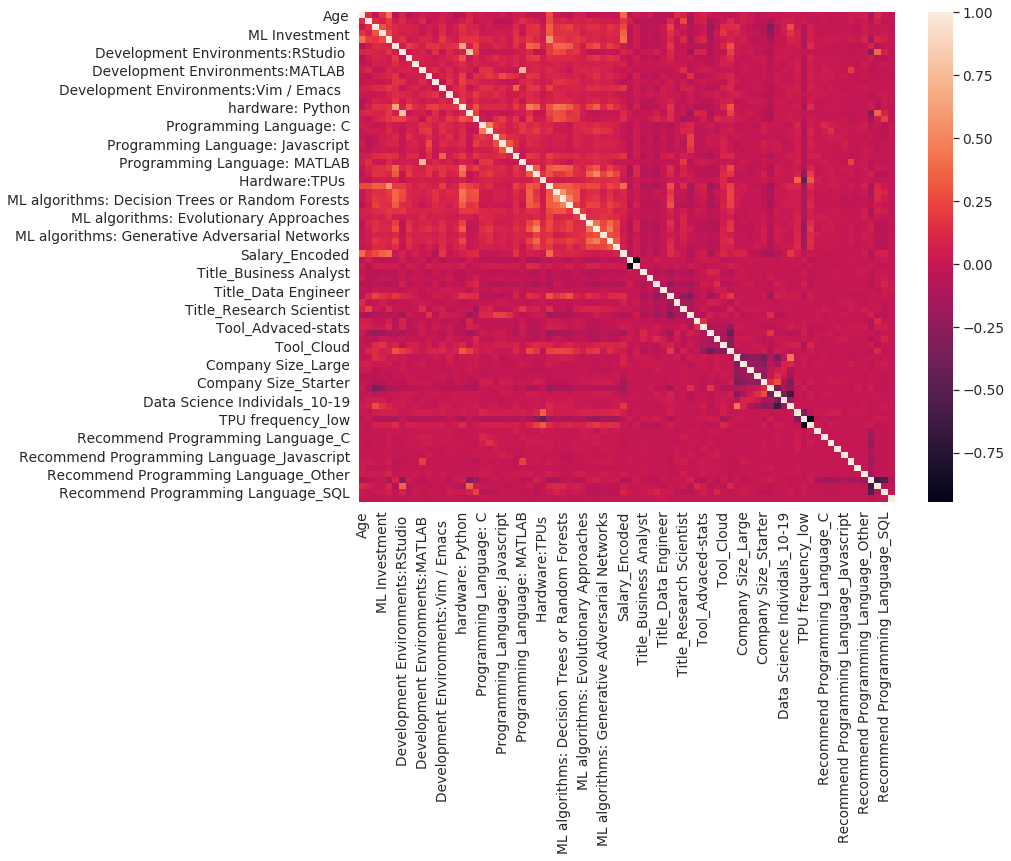

In [66]:
corrmat = survey_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat);

This above correlation heatmap shows the correlation between each feature. We will take a closer look at the feature that are highly correlated to the target variable "Salary_Encoded". I will plot the heatmap for relevant features that have corr() value greater than and equal to 0.15 with target column. Althrough correlation heatmap is a great way to check the relationships between features, one of the draw back would be it works on the numerical data. Thus, I did this step after the one hot encoding. 

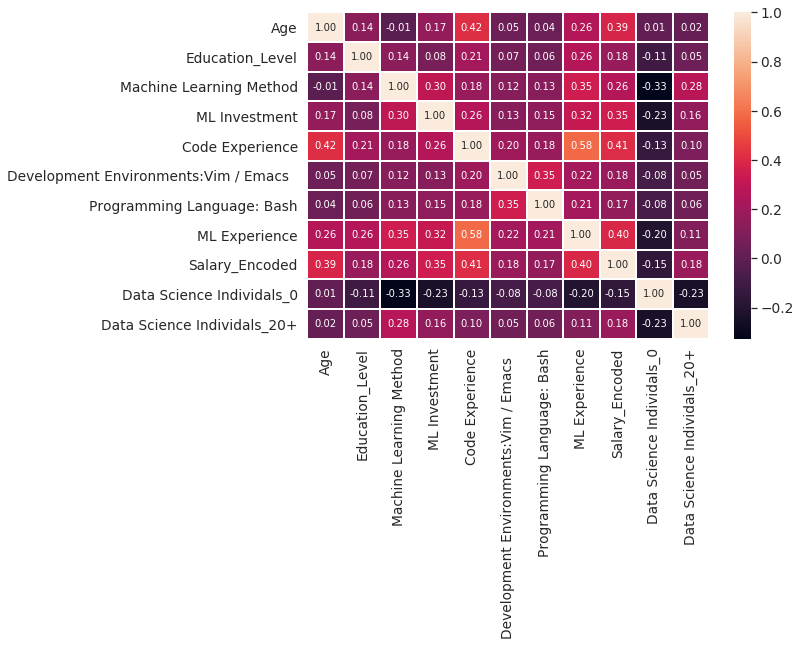

In [40]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(9,6))
relevant_features = corrmat[abs(corrmat['Salary_Encoded'])>=0.15].index
cm = np.corrcoef(survey_df[relevant_features].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=relevant_features.values, xticklabels=relevant_features.values,linewidths=1)
plt.show()

<b>Which of the original attributes in the data are most related to a survey respondent's yearly compensation?</b>
<p>From the above correlation heatmap, we can see that the "Code Experience" feature has the highest corr value at 0.41 with the target value "Salary_Encoded" and "Code Experience" would be most related to the salary.
<p>From this corr plot, we can also concluded that the salary are more related to experience, such as code experience, machine learning experience, etc. 

### II. Data Visualization



Text(0.5, 1.0, 'Figure 1. Distribution of Salay Bucket')

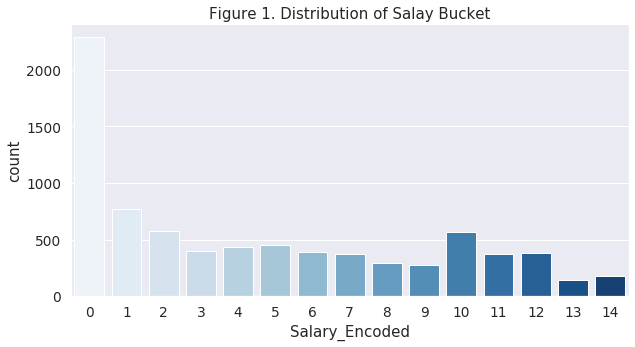

In [41]:
# Remember to clearly label the axis, and give explaination
plt.figure(figsize=(10,5))
plt1 = sns.countplot(x='Salary_Encoded',data=survey_df,palette="Blues")
plt1.set_title('Figure 1. Distribution of Salay Bucket')

From the plot above, we noticed that most of the respondents salary bucket falls in the bucket 0. This means most of the respondents are having reletively low salary. This also means that this dataset is unbalanced, which might have some impact on the salary prediction. 

Text(0.5, 1.0, 'Figure 2. Code Experience and Salary Bucket')

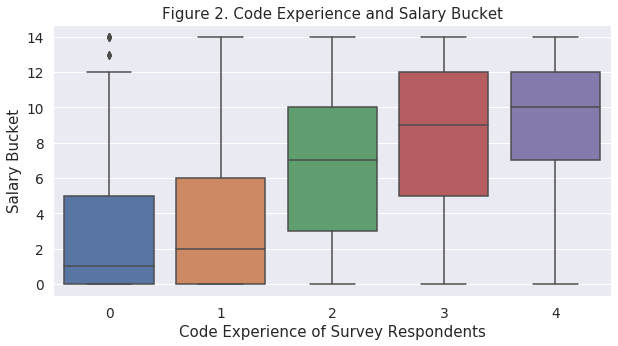

In [42]:
plt.figure(figsize=(10,5))

plt2 = sns.boxplot(x='Code Experience',y='Salary_Encoded',data=survey_df)
plt2.set(xlabel='Code Experience of Survey Respondents',ylabel='Salary Bucket')
plt2.axes.set_title('Figure 2. Code Experience and Salary Bucket')

This boxplot shows a trend that higher code experience lead to higher average salary bucket. As we can read from the figure that when have 0th level of year code experience, the average salary of the respondents' is at bucket 1. While with 4th levels of code experience, the average salary bucket is at 10. 

Text(0.5, 1.08, 'Figure 3. Distribution of Salary Based on ML Experience and Investment')

<Figure size 1440x360 with 0 Axes>

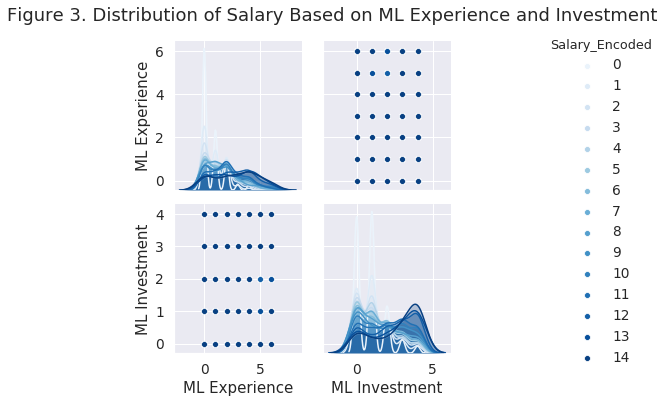

In [43]:
# https://mlwhiz.com/blog/2019/04/19/awesome_seaborn_visuals/
plt.figure(figsize=(20,5))
plt3 = sns.pairplot(survey_df[['Salary_Encoded','ML Experience','ML Investment']],hue = 'Salary_Encoded',palette="Blues")
plt3.fig.suptitle("Figure 3. Distribution of Salary Based on ML Experience and Investment",y=1.08)


This pairplot indicated that more lower level salary bucket falls in to less ML investment and experience categories. With higher investment on ML and high ML experience, more higher level of salary buckts appears. These trends tells us that when we see a data point with high level of experience and investment on coding or machine learning experience, this data point might have high salary. 

# 3. Feature Selection

### <b>I. How feature engineering is a useful tool in machine learning?</b>
Normally when we get the raw data, there are a lot of different features from the dataset. If we simply use all the features in the machine learning algorithms, the prediction of the result might be influenced by the irrelevant data and failed to perform well. When we do feature engineering, we can get the imformation on which features are correlated with the target variable, which features are not. This way, we can selected the useful features and use them in the machine learning algorithms and improve the performance. Well engineered features lead to better representation of all the data available and data could be used to best characterize the underlying problem. 

<p>Feature selection is one of the important steps in this assignment. In this dataset, not necessarily every column is going to have influence on the target variable, which is the "Salary_Encoded" column.



### II. Feature Selection Algorithm: L1 Regularized Regression
In this step, I will use L1 regularized regression algorithm to perform feature selection. The code are showing below.
<p><b>About Lasso L1 Regularized Regression</b>
<p>Lasso regularized regression is one of the feature selection method. The main idea behind the algorithm is to add a penalty for non-zero coefficients of the features on the sum of thieir absolue values. If the coefficient is resulted to zero, the feature would have no impact on the hypothesis funtion. Thus, we could option out those columns from our further analysis.

In [0]:
#https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
y = survey_df['Salary_Encoded']
X = survey_df.copy()
X.drop(['Salary_Encoded','Salary_Buckets','Country','NaN'], axis =1,inplace=True)

In [45]:
scaler = StandardScaler()
scaler.fit(X)

clf = SelectFromModel(Lasso(alpha=0.1))
clf.fit(scaler.transform(X),y)

clf_coef = clf.estimator_.coef_

features = pd.DataFrame(clf_coef,columns=['Lasso Coefficient'],index=X.columns).sort_values('Lasso Coefficient',ascending=False)
selected_features = features[features['Lasso Coefficient'] != 0]
selected_features

,Lasso Coefficient
Age,1.053744
ML Investment,0.659630
Code Experience,0.610349
ML Experience,0.548000
Machine Learning Method,0.407942
Data Science Individals_20+,0.241182
Development Environments:Vim / Emacs,0.240508
Education_Level,0.157354
Programming Language: SQL,0.119791
Programming Language: Bash,0.118586


<b>Why selected that set of features?</b>
<p>The above code fit the survey dataframe to the lasso regression with alpha = 0.1. The lasso applied penalty and shrink some of the coefficients to zero. The <b>.estimator_.coef_</b> method returns the modified coefficients. The following code created a dataframe that contains the features name and the corrsponding coefficiend. The <b>!= 0</b> code opt out the coefficient that were shrinked to zero and kept the features as selected features for the model. 

In [0]:
selected_features_name = selected_features.index.tolist()

In [0]:
# Create the new dataframe from the selected features
survey_df_new = survey_df[selected_features_name]
# Append the target column from the original df to the new df
survey_df_new['Salary_Encoded'] = survey_df['Salary_Encoded']

In [48]:
survey_df_new.head()

,Age,ML Investment,Code Experience,ML Experience,Machine Learning Method,Data Science Individals_20+,Development Environments:Vim / Emacs,Education_Level,Programming Language: SQL,Programming Language: Bash,Recommend Programming Language_SQL,Tool_Cloud,Development Environments:Atom,Title_Product/Project Manager,Title_Data Scientist,Company Size_Large,TPU frequency_medium,Title_Data Analyst,Tool_Basic-stats,Programming Language: C++,Development Environments:Jupyter,Programming Language: Java,Hardware:CPUs,ML algorithms: Convolutional Neural Networks,Development Environments:Notepad++,Title_Research Scientist,Programming Language: C,Company Size_Starter,Development Environments:Spyder,Salary_Encoded
0,23.0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,1,3
1,42.0,4,0,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23.0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,52.0,3,4,5,3,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,6
5,23.0,1,1,2,1,1,0,3,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,1


# 4. Model Implementation


### I. Oridinal Multi-class Classification
<p>For the target variable, we have 15 salary bucket classes which have an order. When doing model implementation, we don't want to lose imformation on the ordered relationship. Thus, we have several steps to do before implementing the model. 



*   Create "dummy" target fields. First set salary "bucket 0" to be 0, the rest buckets to 1. Then set "bucket 0" and "bucket 1" to 0, and the rest to 1. Follow the same procedure for all the salary buckets.
*   Eg: column ['0_and_other'] has the following values (bucket 0 = 0, bucket 1 to 14 = 1), column ['012345_and_other'] has values( bucket 0 to 5 = 0, bucket 0 to 14 = 1)
*   Build one logistic model for each dummy target columns. Each of these models will predict the data points belongs to class 0 or class 1 and return the probability. 
*   Following formula was used to calculate the probability that the data belongs to which class:


>>> *prob(bucket=0)=1-prob(bucket>0)* <p>
>>>*prob(bucket=i)=prob(bucket>i-1)-prob(bucket>i)*<p>
>>>*prob(bucket=k)=prob(bucket>i-1)*



In [0]:
def classfier(row, seperater):
    if row['Salary_Encoded'] > seperater:
        return 1
    else:
        return 0

In [0]:
survey_df_new['0_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 0), axis=1)
survey_df_new['01_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 1), axis=1)
survey_df_new['012_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 2), axis=1)
survey_df_new['0123_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 3), axis=1)
survey_df_new['01234_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 4), axis=1)
survey_df_new['012345_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 5), axis=1)
survey_df_new['0123456_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 6), axis=1)
survey_df_new['01234567_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 7), axis=1)
survey_df_new['012345678_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 8), axis=1)
survey_df_new['0123456789_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 9), axis=1)
survey_df_new['012345678910_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 10), axis=1)
survey_df_new['01234567891011_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 11), axis=1)
survey_df_new['0123456789101112_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 12), axis=1)
survey_df_new['012345678910111213_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 13), axis=1)
survey_df_new['14'] = survey_df_new.apply (lambda row: classfier(row,seperater = 14), axis=1)

### II. Building Logistic Regression Model with 10 folds Cross Validation

In [0]:
# Seperate the test into train df and test df
train = survey_df_new.sample(frac=0.7)
test = survey_df_new.drop(train.index)

In [52]:
# Run Cross Validation on the train data with the dummy target values and calaulate the probabilities
kfold = KFold(n_splits=10)
scaler = StandardScaler()
kfold.get_n_splits(X)
model = LogisticRegression()

accuracy = np.zeros(10)
np_idx = 0

X = train[selected_features_name]
y = train['Salary_Encoded']

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)    


    y_0 = train['0_and_other']
    y_train_0, y_test_0 = y_0.values[train_idx], y_0.values[test_idx]  
    model.fit(X_train,y_train_0)
    y_predictions_0 = model.predict(X_test)
    y_probabilities_0 = model.predict_proba(X_test)
    pr_0 = pd.Series(y_probabilities_0[:,0])
    #result['pr_0'] = pd.Series(y_probabilities_0[:,0])

    y_1 = train['01_and_other']
    y_train_1, y_test_1 = y_1.values[train_idx], y_1.values[test_idx]    
    model.fit(X_train, y_train_1)
    y_predictions_1=model.predict(X_test)
    y_probabilities_1=model.predict_proba(X_test)
    pr_1 = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])
    #result['pr_1'] = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])

    y_2 = train['012_and_other']
    y_train_2, y_test_2 = y_2.values[train_idx], y_2.values[test_idx]    
    model.fit(X_train, y_train_2)
    y_predictions_2=model.predict(X_test)
    y_probabilities_2=model.predict_proba(X_test)
    pr_2 = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])
    #result['pr_2'] = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])

    y_3 = train['0123_and_other']
    y_train_3, y_test_3 = y_3.values[train_idx], y_3.values[test_idx]    
    model.fit(X_train,y_train_3)
    y_predictions_3=model.predict(X_test)
    y_probabilities_3=model.predict_proba(X_test)
    pr_3 = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])
    #result['pr_3'] = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])

    y_4 = train['01234_and_other']
    y_train_4, y_test_4 = y_4.values[train_idx], y_4.values[test_idx]    
    model.fit(X_train,y_train_4)
    y_predictions_4=model.predict(X_test)
    y_probabilities_4=model.predict_proba(X_test)
    pr_4 = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])
    #result['pr_4'] = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])

    y_5 = train['012345_and_other']
    y_train_5, y_test_5 = y_5.values[train_idx], y_5.values[test_idx]    
    model.fit(X_train,y_train_5)
    y_predictions_5=model.predict(X_test)
    y_probabilities_5=model.predict_proba(X_test)
    pr_5 = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])
    #result['pr_5'] = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])

    y_6 = train['0123456_and_other']
    y_train_6, y_test_6 = y_6.values[train_idx], y_6.values[test_idx]    
    model.fit(X_train,y_train_6)
    y_predictions_6=model.predict(X_test)
    y_probabilities_6=model.predict_proba(X_test)
    pr_6 = pd.Series(y_probabilities_5[:,1] - y_probabilities_6[:,1])
    #result['pr_6'] = pd.Series(y_probabilities_5[:,1] - y_probabilities_6[:,1])

    y_7 = train['01234567_and_other']
    y_train_7, y_test_7 = y_7.values[train_idx], y_7.values[test_idx]    
    model.fit(X_train,y_train_7)
    y_predictions_7=model.predict(X_test)
    y_probabilities_7=model.predict_proba(X_test)
    pr_7 = pd.Series(y_probabilities_6[:,1] - y_probabilities_7[:,1])
    #result['pr_7'] = pd.Series(y_probabilities_6[:,1] - y_probabilities_7[:,1])

    y_8 = train['012345678_and_other']
    y_train_8, y_test_8 = y_8.values[train_idx], y_8.values[test_idx]    
    model.fit(X_train,y_train_8)
    y_predictions_8=model.predict(X_test)
    y_probabilities_8=model.predict_proba(X_test)
    pr_8 = pd.Series(y_probabilities_7[:,1] - y_probabilities_8[:,1])
    #result['pr_8'] = pd.Series(y_probabilities_7[:,1] - y_probabilities_8[:,1])

    y_9 = train['0123456789_and_other']
    y_train_9, y_test_9 = y_9.values[train_idx], y_9.values[test_idx]    
    model.fit(X_train,y_train_9)
    y_predictions_9=model.predict(X_test)
    y_probabilities_9=model.predict_proba(X_test)
    pr_9 = pd.Series(y_probabilities_8[:,1] - y_probabilities_9[:,1])
    #result['pr_9'] = pd.Series(y_probabilities_8[:,1] - y_probabilities_9[:,1])

    y_10 = train['012345678910_and_other']
    y_train_10, y_test_10 = y_10.values[train_idx], y_10.values[test_idx]    
    model.fit(X_train,y_train_10)
    y_predictions_10=model.predict(X_test)
    y_probabilities_10=model.predict_proba(X_test)
    pr_10 = pd.Series(y_probabilities_9[:,1] - y_probabilities_10[:,1])
    #result['pr_10'] = pd.Series(y_probabilities_9[:,1] - y_probabilities_10[:,1])

    y_11 = train['01234567891011_and_other']
    y_train_11, y_test_11 = y_11.values[train_idx], y_11.values[test_idx]    
    model.fit(X_train,y_train_11)
    y_predictions_11=model.predict(X_test)
    y_probabilities_11=model.predict_proba(X_test)
    pr_11 = pd.Series(y_probabilities_10[:,1] - y_probabilities_11[:,1])
    #result['pr_11'] = pd.Series(y_probabilities_10[:,1] - y_probabilities_11[:,1])

    y_12 = train['0123456789101112_and_other']
    y_train_12, y_test_12 = y_12.values[train_idx], y_12.values[test_idx]    
    model.fit(X_train,y_train_12)
    y_predictions_12=model.predict(X_test)
    y_probabilities_12=model.predict_proba(X_test)
    pr_12 = pd.Series(y_probabilities_11[:,1] - y_probabilities_12[:,1])
    #result['pr_12'] = pd.Series(y_probabilities_11[:,1] - y_probabilities_12[:,1])

    y_13 = train['012345678910111213_and_other']
    y_train_13, y_test_13 = y_13.values[train_idx], y_13.values[test_idx]    
    model.fit(X_train,y_train_13)
    y_predictions_13=model.predict(X_test)
    y_probabilities_13=model.predict_proba(X_test)
    pr_13 = pd.Series(y_probabilities_12[:,1] - y_probabilities_13[:,1])
    #result['pr_13'] = pd.Series(y_probabilities_12[:,1] - y_probabilities_13[:,1])

    pr_14 = pd.Series(y_probabilities_13[:,1])
    #result['pr_14'] = pd.Series(y_probabilities_13[:,1])
    
    result = pd.DataFrame()

    result = pd.concat([result, pr_0, pr_1, pr_2, pr_3, pr_4, pr_5, pr_6, pr_7, pr_8, pr_9, pr_10, pr_11, pr_12, pr_13, pr_14],axis=1)
    result['assigned_bucket'] = result[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].idxmax(axis=1)
    result['y_test'] = y_test
    y_predict = result.assigned_bucket.tolist()


    TN = confusion_matrix(y_test, y_predict)[0][0]
    FP = confusion_matrix(y_test, y_predict)[0][1]
    FN = confusion_matrix(y_test, y_predict)[1][0]
    TP = confusion_matrix(y_test, y_predict)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)

    accuracy[np_idx] = ACC*100
    np_idx += 1
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 74.742%
Fold 2: Accuracy: 78.889%
Fold 3: Accuracy: 73.399%
Fold 4: Accuracy: 77.32%
Fold 5: Accuracy: 76.238%
Fold 6: Accuracy: 74.528%
Fold 7: Accuracy: 71.429%
Fold 8: Accuracy: 77.895%
Fold 9: Accuracy: 75.521%
Fold 10: Accuracy: 73.0%
Average Score: 75.296%(2.223%)


<b>How does the model accuracy comapre across the folds?</b>
<p>It is oberseved that different choose of folds yield to different overall accuacy of the model. We can see the accuacy is highest at 2nd folds and lowest at 7th fold.
<p><b>What is the average and variance of accuracy for folds?</b>
<p>The average of the folds is 75.296%, and the variance is 2.223%.
<p><b>Treating each fold as a new model, which model performed best?</b>
<p>Normally, the higher the average accuacy, the lower the bias. The lower the standard deviation, the lower the variance. We want low bias and low variance model. Therefore, within one standard deviration of the average score, <b>fold 4</b> has the best accuacy. 

In [53]:
result.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,assigned_bucket,y_test
0,0.571666,0.149281,0.063176,0.034608,0.050012,0.034466,0.021149,0.021545,0.012852,0.014561,0.011568,0.005740,0.004988,0.002669,0.001721,0,2
1,0.188402,0.117016,0.066213,0.046986,0.082887,0.120154,0.075734,0.076967,0.067384,0.054020,0.064209,0.020672,0.013387,0.002986,0.002981,0,9
2,0.372430,0.131161,0.101932,0.083550,0.081329,0.080149,0.033704,0.024464,0.017682,0.019581,0.026571,0.007774,0.013946,0.003400,0.002329,0,0
3,0.034011,-0.011982,0.005915,0.004896,-0.001509,0.013478,0.012453,0.020963,0.021940,0.024303,0.163552,0.212187,0.107985,0.180665,0.211143,11,13
4,0.712575,0.120715,0.038677,0.019210,0.029326,0.013545,0.015418,0.015234,0.009903,0.007620,0.007381,0.004383,0.003060,0.001605,0.001348,0,0
5,0.590510,0.102537,0.088132,0.027701,0.032496,0.022950,0.024923,0.029010,0.018128,0.011739,0.025861,0.005180,0.009416,0.006549,0.004870,0,0
6,0.505877,0.065929,0.074388,0.044795,0.025918,0.048035,0.048355,0.038743,0.035111,0.027122,0.045619,0.018223,0.006296,0.007614,0.007974,0,0
7,0.268831,0.075670,0.136741,0.077574,0.070934,0.100177,0.080476,0.053857,0.029793,0.021361,0.050142,0.011416,0.010401,0.005255,0.007372,0,1
8,0.018753,0.008107,0.012391,0.006688,0.002539,0.013416,0.015742,0.026086,0.000037,0.012243,0.065372,0.159212,0.263133,0.121516,0.274765,14,10
9,0.391099,0.126627,0.116771,0.062732,0.074218,0.056947,0.041708,0.040448,0.015775,0.020786,0.022850,0.013649,0.010351,0.003462,0.002577,0,0


The above dataframe shows the output of the model which contains the probability of belonging to each of the salary buckets.

# 5. Model Tuning 





In this section, the code below performs the hyperparameter tuning using grid search. Grid search is a well known method for selecting hyperparameters that optimize the model. Hyperparameter are very important in getting good performance with models. In this step, two hyperparameters C and the solver are varied with 10 folds cross validation. To evalute the best hyparameters, i choosed to compare the accuracy, precision, recall, and f1 score by printing their classification report. The output of this step will return the classfication report of the model with different C and different solver. Then, the model with highest accuracy will be the best model.

In [54]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

X = train[selected_features_name]
y = train['Salary_Encoded']

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        #accuracy = np.zeros(10)
        #np_idx = 0
        
        #for train_idx, test_idx in kfold.split(X):
            #X_train, X_test = X.values[train_idx], X.values[test_idx]
            #y_train, y_test = y.values[train_idx], y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)    
            


            y_0 = train['0_and_other']
            y_train_0, y_test_0 = y_0.values[train_idx], y_0.values[test_idx]  
            model.fit(X_train,y_train_0)
            y_predictions_0 = model.predict(X_test)
            y_probabilities_0 = model.predict_proba(X_test)
            pr_0 = pd.Series(y_probabilities_0[:,0])

            y_1 = train['01_and_other']
            y_train_1, y_test_1 = y_1.values[train_idx], y_1.values[test_idx]    
            model.fit(X_train, y_train_1)
            y_predictions_1=model.predict(X_test)
            y_probabilities_1=model.predict_proba(X_test)
            pr_1 = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])

            y_2 = train['012_and_other']
            y_train_2, y_test_2 = y_2.values[train_idx], y_2.values[test_idx]    
            model.fit(X_train, y_train_2)
            y_predictions_2=model.predict(X_test)
            y_probabilities_2=model.predict_proba(X_test)
            pr_2 = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])

            y_3 = train['0123_and_other']
            y_train_3, y_test_3 = y_3.values[train_idx], y_3.values[test_idx]    
            model.fit(X_train,y_train_3)
            y_predictions_3=model.predict(X_test)
            y_probabilities_3=model.predict_proba(X_test)
            pr_3 = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])

            y_4 = train['01234_and_other']
            y_train_4, y_test_4 = y_4.values[train_idx], y_4.values[test_idx]    
            model.fit(X_train,y_train_4)
            y_predictions_4=model.predict(X_test)
            y_probabilities_4=model.predict_proba(X_test)
            pr_4 = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])

            y_5 = train['012345_and_other']
            y_train_5, y_test_5 = y_5.values[train_idx], y_5.values[test_idx]    
            model.fit(X_train,y_train_5)
            y_predictions_5=model.predict(X_test)
            y_probabilities_5=model.predict_proba(X_test)
            pr_5 = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])

            y_6 = train['0123456_and_other']
            y_train_6, y_test_6 = y_6.values[train_idx], y_6.values[test_idx]    
            model.fit(X_train,y_train_6)
            y_predictions_6=model.predict(X_test)
            y_probabilities_6=model.predict_proba(X_test)
            pr_6 = pd.Series(y_probabilities_5[:,1] - y_probabilities_6[:,1])

            y_7 = train['01234567_and_other']
            y_train_7, y_test_7 = y_7.values[train_idx], y_7.values[test_idx]    
            model.fit(X_train,y_train_7)
            y_predictions_7=model.predict(X_test)
            y_probabilities_7=model.predict_proba(X_test)
            pr_7 = pd.Series(y_probabilities_6[:,1] - y_probabilities_7[:,1])

            y_8 = train['012345678_and_other']
            y_train_8, y_test_8 = y_8.values[train_idx], y_8.values[test_idx]    
            model.fit(X_train,y_train_8)
            y_predictions_8=model.predict(X_test)
            y_probabilities_8=model.predict_proba(X_test)
            pr_8 = pd.Series(y_probabilities_7[:,1] - y_probabilities_8[:,1])

            y_9 = train['0123456789_and_other']
            y_train_9, y_test_9 = y_9.values[train_idx], y_9.values[test_idx]    
            model.fit(X_train,y_train_9)
            y_predictions_9=model.predict(X_test)
            y_probabilities_9=model.predict_proba(X_test)
            pr_9 = pd.Series(y_probabilities_8[:,1] - y_probabilities_9[:,1])

            y_10 = train['012345678910_and_other']
            y_train_10, y_test_10 = y_10.values[train_idx], y_10.values[test_idx]    
            model.fit(X_train,y_train_10)
            y_predictions_10=model.predict(X_test)
            y_probabilities_10=model.predict_proba(X_test)
            pr_10 = pd.Series(y_probabilities_9[:,1] - y_probabilities_10[:,1])

            y_11 = train['01234567891011_and_other']
            y_train_11, y_test_11 = y_11.values[train_idx], y_11.values[test_idx]    
            model.fit(X_train,y_train_11)
            y_predictions_11=model.predict(X_test)
            y_probabilities_11=model.predict_proba(X_test)
            pr_11 = pd.Series(y_probabilities_10[:,1] - y_probabilities_11[:,1])

            y_12 = train['0123456789101112_and_other']
            y_train_12, y_test_12 = y_12.values[train_idx], y_12.values[test_idx]    
            model.fit(X_train,y_train_12)
            y_predictions_12=model.predict(X_test)
            y_probabilities_12=model.predict_proba(X_test)
            pr_12 = pd.Series(y_probabilities_11[:,1] - y_probabilities_12[:,1])

            y_13 = train['012345678910111213_and_other']
            y_train_13, y_test_13 = y_13.values[train_idx], y_13.values[test_idx]    
            model.fit(X_train,y_train_13)
            y_predictions_13=model.predict(X_test)
            y_probabilities_13=model.predict_proba(X_test)
            pr_13 = pd.Series(y_probabilities_12[:,1] - y_probabilities_13[:,1])

            pr_14 = pd.Series(y_probabilities_13[:,1])

            result = pd.DataFrame()

            result = pd.concat([result, pr_0, pr_1, pr_2, pr_3, pr_4, pr_5, pr_6, pr_7, pr_8, pr_9, pr_10, pr_11, pr_12, pr_13, pr_14],axis=1)
            result['assigned_bucket'] = result[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].idxmax(axis=1)
            result['y_test'] = y_test

            y_predict = result.assigned_bucket.tolist()


            TN = confusion_matrix(y_test, y_predict)[0][0]
            FP = confusion_matrix(y_test, y_predict)[0][1]
            FN = confusion_matrix(y_test, y_predict)[1][0]
            TP = confusion_matrix(y_test, y_predict)[1][1]
            total = TN + FP + FN + TP
            
            ACC = (TP + TN) / float(total)
            
            #accuracy[np_idx] = ACC*100
            #np_idx += 1

    print("For C=",C,"Solver=",solver,'\n',classification_report(y_test, y_predict))

    if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)
            
            


For C= 0.001 Solver= sag 
               precision    recall  f1-score   support

           0       0.33      0.95      0.49       167
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        12
          10       0.16      0.19      0.18        37
          11       0.50      0.05      0.10        19
          12       0.26      0.26      0.26        27
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00        10

    accuracy                           0.32       551
   macro avg       0.08      0.10      0.07       551

In [55]:
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.1, 'solver': 'sag'}
Best Score: 75.398%(2.233%)

The optimal log model uses C=0.1, and a sag solver, and has a cross validation score of 75.398% with a standard deviation of 2.233%


Note: Since the cross validation code can run a quite long time, I have comment out the cross validation code from the above cell, the best parameter has been hard coded to the best_mode. If anyone would like to rerun the model tuning part, please remove the comment mark. 


# 6. Testing and Discussion

### I. Testing the test data with the optimal model. 

In [0]:
best_model = LogisticRegression(C = 0.1, solver= 'sag')
scaler = StandardScaler()

X_train = train[selected_features_name]
y_train = train['Salary_Encoded']

X_test = test[selected_features_name]
y_test = test['Salary_Encoded']


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_0 = train['0_and_other']
best_model.fit(X_train,y_train_0)
y_predictions_0 = best_model.predict(X_test)
y_probabilities_0 = best_model.predict_proba(X_test)
pr_0 = pd.Series(y_probabilities_0[:,0])

y_train_1 = train['01_and_other']
best_model.fit(X_train, y_train_1)
y_predictions_1=best_model.predict(X_test)
y_probabilities_1=best_model.predict_proba(X_test)
pr_1 = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])

y_train_2 = train['012_and_other']
best_model.fit(X_train, y_train_2)
y_predictions_2=best_model.predict(X_test)
y_probabilities_2=best_model.predict_proba(X_test)
pr_2 = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])

y_train_3 = train['0123_and_other']
best_model.fit(X_train,y_train_3)
y_predictions_3=best_model.predict(X_test)
y_probabilities_3=best_model.predict_proba(X_test)
pr_3 = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])

y_train_4 = train['01234_and_other']
best_model.fit(X_train,y_train_4)
y_predictions_4=best_model.predict(X_test)
y_probabilities_4=best_model.predict_proba(X_test)
pr_4 = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])

y_train_5 = train['012345_and_other']
best_model.fit(X_train,y_train_5)
y_predictions_5=best_model.predict(X_test)
y_probabilities_5=best_model.predict_proba(X_test)
pr_5 = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])

y_train_6 = train['0123456_and_other']
best_model.fit(X_train,y_train_6)
y_predictions_6=best_model.predict(X_test)
y_probabilities_6=best_model.predict_proba(X_test)
pr_6 = pd.Series(y_probabilities_5[:,1] - y_probabilities_6[:,1])

y_train_7 = train['01234567_and_other']
best_model.fit(X_train,y_train_7)
y_predictions_7=best_model.predict(X_test)
y_probabilities_7=best_model.predict_proba(X_test)
pr_7 = pd.Series(y_probabilities_6[:,1] - y_probabilities_7[:,1])

y_train_8 = train['012345678_and_other']
best_model.fit(X_train,y_train_8)
y_predictions_8=best_model.predict(X_test)
y_probabilities_8=best_model.predict_proba(X_test)
pr_8 = pd.Series(y_probabilities_7[:,1] - y_probabilities_8[:,1])

y_train_9 = train['0123456789_and_other']
best_model.fit(X_train,y_train_9)
y_predictions_9=best_model.predict(X_test)
y_probabilities_9=best_model.predict_proba(X_test)
pr_9 = pd.Series(y_probabilities_8[:,1] - y_probabilities_9[:,1])

y_train_10 = train['012345678910_and_other']
best_model.fit(X_train,y_train_10)
y_predictions_10=best_model.predict(X_test)
y_probabilities_10=best_model.predict_proba(X_test)
pr_10 = pd.Series(y_probabilities_9[:,1] - y_probabilities_10[:,1])

y_train_11 = train['01234567891011_and_other']
best_model.fit(X_train,y_train_11)
y_predictions_11=best_model.predict(X_test)
y_probabilities_11=best_model.predict_proba(X_test)
pr_11 = pd.Series(y_probabilities_10[:,1] - y_probabilities_11[:,1])

y_train_12 = train['0123456789101112_and_other']
best_model.fit(X_train,y_train_12)
y_predictions_12=best_model.predict(X_test)
y_probabilities_12=best_model.predict_proba(X_test)
pr_12 = pd.Series(y_probabilities_11[:,1] - y_probabilities_12[:,1])

y_train_13 = train['012345678910111213_and_other']
best_model.fit(X_train,y_train_13)
y_predictions_13=best_model.predict(X_test)
y_probabilities_13=best_model.predict_proba(X_test)
pr_13 = pd.Series(y_probabilities_12[:,1] - y_probabilities_13[:,1])

pr_14 = pd.Series(y_probabilities_13[:,1])

result2 = pd.DataFrame()
result2 = pd.concat([result2, pr_0, pr_1, pr_2, pr_3, pr_4, pr_5, pr_6, pr_7, pr_8, pr_9, pr_10, pr_11, pr_12, pr_13, pr_14],axis=1)
result2['assigned_bucket'] = result2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].idxmax(axis=1)
y_predict2 = result2.assigned_bucket.tolist()

TN = confusion_matrix(y_test, y_predict2)[0][0]
FP = confusion_matrix(y_test, y_predict2)[0][1]
FN = confusion_matrix(y_test, y_predict2)[1][0]
TP = confusion_matrix(y_test, y_predict2)[1][1]
total = TN + FP + FN + TP
            
ACC = (TP + TN) / float(total)
            
accuracy = round(ACC*100,3)


In [58]:
print(accuracy,'%')

74.217 %


<b>How does the model performed on the test set vs. the training set?</b>
<p>The accuracy on the test set is around 74.217%, which is lower than the training accuracy at 75.398%. 


<b>How to increase the accuracy (test, training)?</b>
*   To increase the accuracy, we could try to identify the outliers in our original dataset, remove them and then train our model. 
*   Further modify the feature selection algorithm. Currently, we are using Lasso regularize regression. We could use other feature selection algorithms such as random forest and compare between the selected features for each algotithms and finally make the feature selection decision.
*   In this model, we selected a subset of the original dataset (eg. Top 11 country that reponded to this survey). To increase the accuracy, we could use all the datapoint in the salary prediction analysis. 






In [59]:
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,assigned_bucket,y_test
0,0.571730,0.149372,0.063155,0.034593,0.050023,0.034442,0.021129,0.021539,0.012840,0.014552,0.011546,0.005731,0.004981,0.002668,0.001699,0,2
1,0.188220,0.117077,0.066170,0.046982,0.082888,0.120298,0.075817,0.076981,0.067493,0.054059,0.064250,0.020643,0.013319,0.002937,0.002867,0,9
2,0.372716,0.131172,0.101868,0.083580,0.081344,0.080153,0.033674,0.024446,0.017668,0.019554,0.026536,0.007741,0.013897,0.003379,0.002271,0,0
3,0.033919,-0.011990,0.005904,0.004879,-0.001525,0.013429,0.012408,0.020865,0.021844,0.024143,0.163062,0.212080,0.106599,0.180713,0.213669,14,13
4,0.712784,0.120719,0.038630,0.019177,0.029319,0.013517,0.015400,0.015225,0.009892,0.007612,0.007364,0.004375,0.003056,0.001604,0.001326,0,0


In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score mean")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing score mean")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

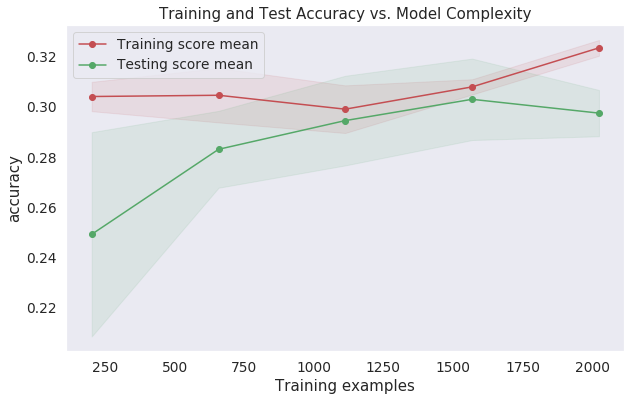

In [61]:
plot_learning_curve(best_model,'Training and Test Accuracy vs. Model Complexity', test[selected_features_name], test['Salary_Encoded'],cv=7)

<b>Is our model overfitting or underfitting?</b>
<p>From the learning curve above, we noticed that the training score is increasing as the traing exapmles increase. The test score increase and then start to decrease after a certain point while the training accuracy keep increasing. This indicates that the model is overfitting. 

### II. Distribution of the algorithm accuacy

In [0]:
report = classification_report(y_test, y_predict2,output_dict=True)

In [0]:
class_acc = []
class_acc.append(report['0']['precision'])
class_acc.append(report['1']['precision'])
class_acc.append(report['2']['precision'])
class_acc.append(report['3']['precision'])
class_acc.append(report['4']['precision'])
class_acc.append(report['5']['precision'])
class_acc.append(report['6']['precision'])
class_acc.append(report['7']['precision'])
class_acc.append(report['8']['precision'])
class_acc.append(report['9']['precision'])
class_acc.append(report['10']['precision'])
class_acc.append(report['11']['precision'])
class_acc.append(report['12']['precision'])
class_acc.append(report['13']['precision'])
class_acc.append(report['14']['precision'])

<function matplotlib.pyplot.show>

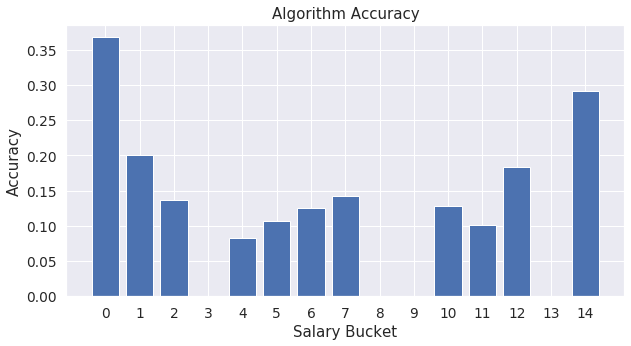

In [64]:
plt.figure(figsize=(10,5))
bars = ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14')
plt.bar(bars, class_acc)
plt.xlabel('Salary Bucket')
plt.ylabel('Accuracy')
plt.title('Algorithm Accuracy')
plt.show

The distribution of the algorithm accuracy are shown in the above figure. We can see that bucket 0 is the class that has the highest accuracy. This makes sense since when explore the data, bucket 0 is the most frequent salary bucket. Some classes have zero accuracy, this are the part where we should do better. 